In [61]:
#Configuración. Primero me importo las librerias necesarias para el ejercicio

#Tratamiento de datos
# ---------------------------------------
import pandas as pd
import numpy as np

#Gestión de nulos 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

#Visualización
#-----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#para configurar los dataframes y ver todas las columnas 
pd.set_option('display.max_columns', None)

Fase 1: Exploración y limpieza 

In [62]:
#Lectura del fichero Customer Flight Activity
customer_flight = pd.read_csv('Customer Flight Activity.csv')
customer_flight

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [63]:
##Lectura del fichero Customer Loyalty History
customer_loyalty = pd.read_csv('Customer Loyalty History.csv')
customer_loyalty

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [64]:
#EDA - customer_flight
customer_flight.head() #me muestra las primeras filas del DF
customer_flight.sample(3) #me muestra 3 filas del DF
customer_flight.shape #filas y columnas tenemos en el DF
customer_flight.columns #nombres de las columnas del DF
customer_flight.info() #nos muestra el número de columnas ordenadas, cuantos datos hay, de que tipo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [65]:
#Vamos a ver los valores unicos de la columna flights booked 
customer_flight['Flights Booked'].unique ()

array([ 3, 10,  6,  0,  8, 11,  9,  4,  7,  5,  2,  1, 12, 13, 14, 16, 15,
       17, 18, 19, 20, 21])

In [66]:
#Tenemos nulos en customer_flight?
customer_flight.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

No tenemos nulos en el DF customer_flight

In [67]:
#Tenemos valores duplicados en el customer_flight?
customer_flight.duplicated().sum().sum()

1864

Si tenemos duplicados en el DF customer_flight

In [68]:
#Vamos a eliminar los valores duplicados en el DF customer_flight
customer_flight.drop_duplicates(inplace=True)

customer_flight.duplicated().sum()

0

Ahora ya no tenemos valores duplicados

In [69]:
#EDA - customer_loyalty 
customer_loyalty.head() #me muestra las primeras filas del DF
customer_loyalty.sample(3) #me muestra 3 filas del DF
customer_loyalty.shape #muestra la cantidad de filas y columnas que tenemos en el DF
customer_loyalty.columns #nombres de las columnas del DF
customer_loyalty.info() #nos muestra el número de columnas ordenadas, cuantos datos hay, de que tipo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [70]:
#Seleccionamos solo las columnas de tipo catégorico del DF. Después mostramos los valores únicos y sus frecuencias para cada una de las columnas seleccionadas. 
customer_loyalty.describe(include = 'object').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [71]:
#Tenemos nulos en customer_flight?
customer_loyalty.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

Las columnas Salary, Cancellation Year y Cancellation Month tienen valores nulos

In [72]:
#Tenemos valores nulos en la columna salary? 
customer_loyalty['Salary'].isnull().sum()

4238

In [73]:
#Exploración de nulos. Vemos porcentajes de nulos 
customer_loyalty.isnull().sum()[customer_loyalty.isnull().sum()>0]/customer_loyalty.shape[0]*100

Salary                25.321145
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

Unión de los DATA FRAME

In [74]:
#Usamos el método merge para combinar los dos DataFrames partiendo de la columna común que es Loyalty Number
customer_data = customer_loyalty.merge(customer_flight, on='Loyalty Number')

customer_data

KeyboardInterrupt: 

In [ ]:
#Vamos a ver como ha quedado el DF
customer_data.shape
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Country                      403760 non-null  object 
 2   Province                     403760 non-null  object 
 3   City                         403760 non-null  object 
 4   Postal Code                  403760 non-null  object 
 5   Gender                       403760 non-null  object 
 6   Education                    403760 non-null  object 
 7   Salary                       301500 non-null  float64
 8   Marital Status               403760 non-null  object 
 9   Loyalty Card                 403760 non-null  object 
 10  CLV                          403760 non-null  float64
 11  Enrollment Type              403760 non-null  object 
 12  Enrollment Year              403760 non-null  int64  
 13 

In [ ]:
#Comprobamos si hay duplicados de nuevo. No debería ya que los hemos eliminado anteriormente
customer_data.duplicated().sum().sum()

0

In [ ]:
#Seleccionamos solo las columnas de tipo catégorico del DF customer_data. 
# Después mostramos los valores únicos y sus frecuencias para cada una de las columnas seleccionadas. 
customer_data.describe(include = 'object').T

,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


In [ ]:
#Cuantos nulos tenemos ahora? 
customer_data.isnull().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

In [ ]:
#Cuál es el actual porcentaje de nulos? 
customer_data.isnull().sum()[customer_data.isnull().sum()>0]/customer_data.shape[0]*100 

Salary                25.326927
Cancellation Year     87.703091
Cancellation Month    87.703091
dtype: float64

Gestión de nulos

Vemos que el porcentaje de nulos en la columna Salary es pequeña, por lo que la imputación con la media o la mediana puede ser una opción razonable. 
Para decidir si hacemos la media o la mediana en la columna Salary vamos a ver si hay valores atípicos. 

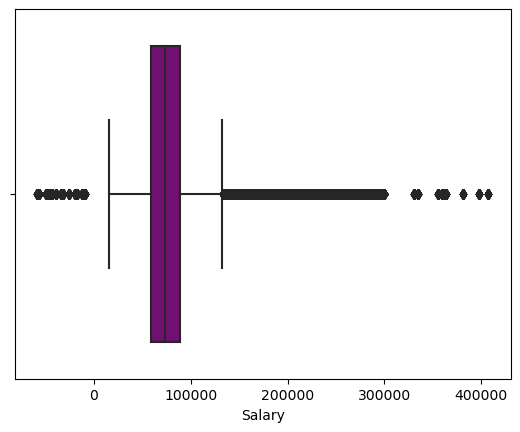

In [ ]:
#Usaremos un Boxplot para mostrar la distribución del dato salary y si hay muchos outlyers 
#boxplot 
sns.boxplot(data=customer_data,
            x="Salary",
            color="purple");

Entendemos que hay bastante dispersión de los datos de la columna salary, por lo tanto vamos a aplicar la mediana para gestionar los nulos de la columna Salary. 

In [ ]:
#Calculamos la mediana de la columna Salary 
mediana_salary = customer_data["Salary"].median()
mediana_salary

#Imputamos la mediana en la columna Salary 
customer_data["Salary"] = customer_data["Salary"].fillna(mediana_salary)

#Comprobamos que no tenemos nulos en la columna Salary 
customer_data["Salary"].isnull().sum()

0

En las columnas Cancellation Year o Cancellation Month el porcentaje de valores nulos es mucho mayor, por lo tanto les voy atribuir el valor númerico 0, eliminando los nulos del DF. 

In [ ]:
#Voy a rellenar los nulos de las columnas Cancellation Month y Cancellation Year con 0
customer_data["Cancellation Month"]= customer_data["Cancellation Month"].fillna(0)
customer_data["Cancellation Year"]= customer_data["Cancellation Year"].fillna(0)

customer_data

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,8,0,0,0,0,0.0,0,0
403756,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,9,0,0,0,0,0.0,0,0
403757,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0
403758,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,11,0,0,0,0,0.0,0,0


In [ ]:
#Comprobamos si hay valores nulos
customer_data.isnull().sum()

Loyalty Number                 0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

Fase 2. Visualización 

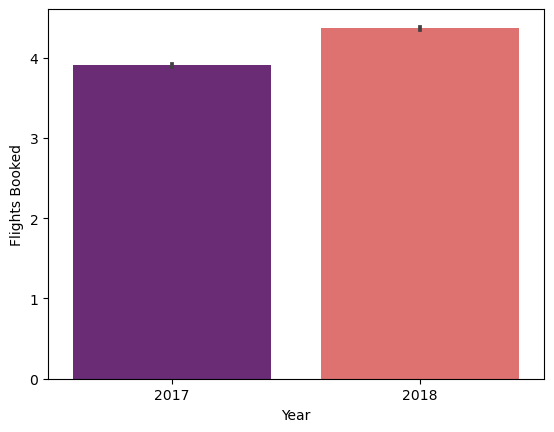

In [ ]:
#1. Cómo se distribuye la cantidad de vuelos reservados por mes durante el año? 
#Vamos a usar un histograma porqué las dos variables son númericas: 
sns.barplot(data=customer_data, 
            x="Year",
            y="Flights Booked", 
            palette="magma");

En 2018 se reservan más vuelos que en 2017

Pero esto no es lo que me pide el ejercicio, ya que quiere que se muestre la cantidad de vuelos por mes y año.

In [ ]:
#Primero tengo que hacer un DF por año y mes para ver la cantidad de vuelos mensual.
cd_2017 = customer_data[customer_data["Year"] == 2017]

cd_2017.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
5,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,5,13,4,17,3757,375.0,0,0


In [ ]:
cd_2018 = customer_data[customer_data["Year"] == 2018]

cd_2018.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.00,465,38
13,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,1,2,0,2,2860,286.00,0,0
14,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,12,3,3,6,2580,258.00,631,51
15,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,4,13,3,16,1504,162.00,0,0
16,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,3,2,2,4,1584,170.64,0,0


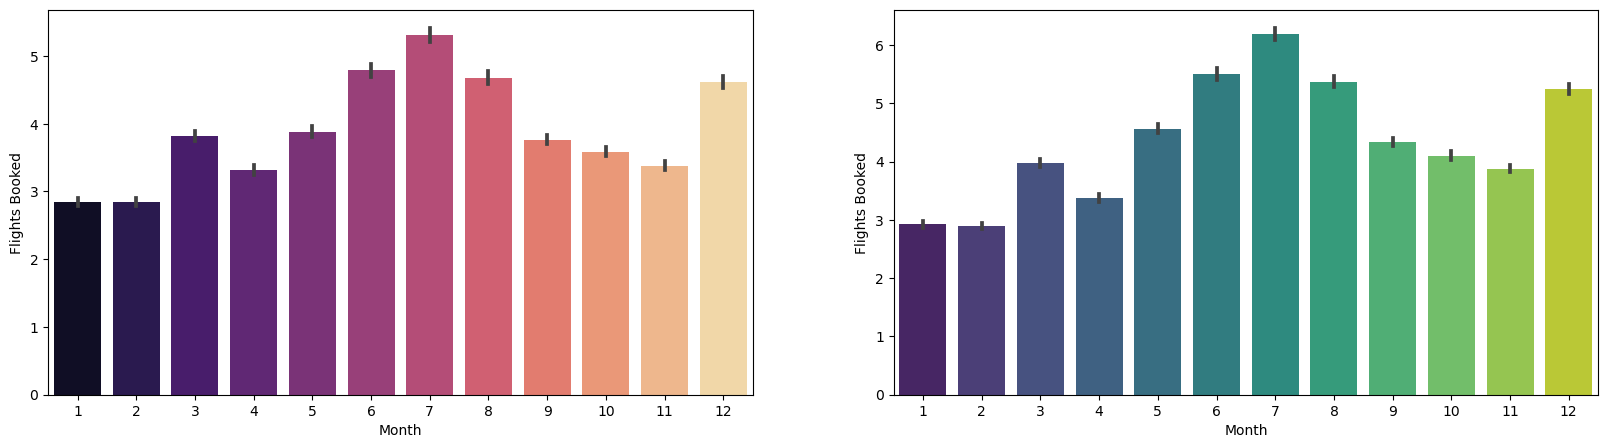

In [75]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.barplot(data=cd_2017, 
            x="Month",
            y="Flights Booked", 
            palette="magma",
            ax= axes[0]
            );

sns.barplot(data=cd_2018, 
            x="Month",
            y="Flights Booked", 
            palette="viridis",
            ax= axes[1]
            );


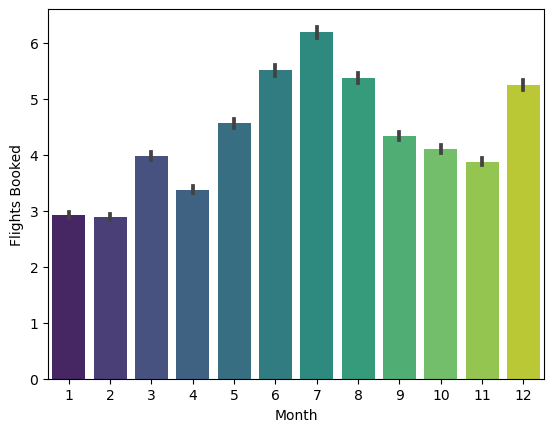

In [ ]:
sns.barplot(data=cd_2018, 
            x="Month",
            y="Flights Booked", 
            palette="viridis");

<Axes: xlabel='Distance', ylabel='Points Accumulated'>

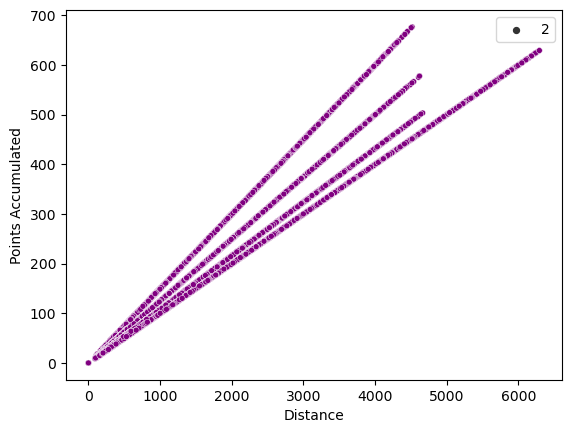

In [ ]:
#2. Éxiste una relación entre la distancia de los vuelos y los puntos acumulados por los clientes? 
# Usamos el scatterplot porqué estamos ante variables númericas y buscamos una relación entre ellas. 
sns.scatterplot(data=customer_data, x="Distance", y="Points Accumulated", size=2, color="purple")

Observamos que hay una correlación positiva. La distancia y los puntos acumulados crecen a la vez, por lo tanto cuanto más distancia recorres, más puntos acumulas. 

Text(0, 0.5, 'Nº of clients')

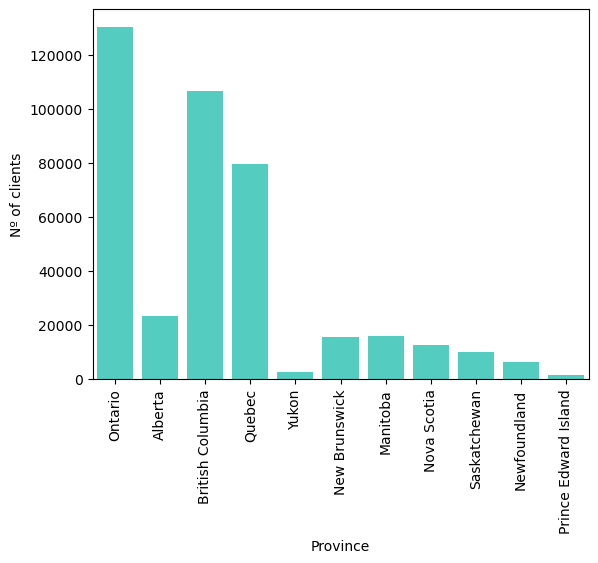

In [ ]:
#3. Cuál es la distribución de los clientes por provincia o estado? 
# Usamos el countplot porqué nos muestra el recuento de una variable categórica.
sns.countplot(data=customer_data, 
              x="Province", 
              color="turquoise");
plt.xticks(rotation=90);

plt.ylabel("Nº of clients")

Los clientes de la compañía tienen su origen en las provincias de Ontario, British Columbia y Quebec. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


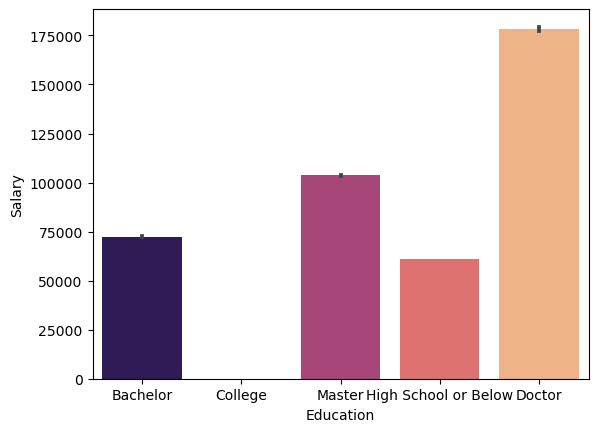

In [ ]:
#4. Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes? 
sns.barplot(data=customer_data, 
            x="Education",
            y="Salary", 
            palette="magma");

In [ ]:
#5. Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 
#Primero voy a filtrar con un groupby la información que me está pidiendo el enunciado y 
# luego usare un pieplot para mostrar la proporción de clientes con los diferentes tipos de tarjetas fidelidad.
cd_loyalty = customer_data.groupby("Loyalty Card")["Loyalty Number"].count().reset_index()

cd_loyalty


,Loyalty Card,Loyalty Number
0,Aurora,83132
1,Nova,136883
2,Star,183745


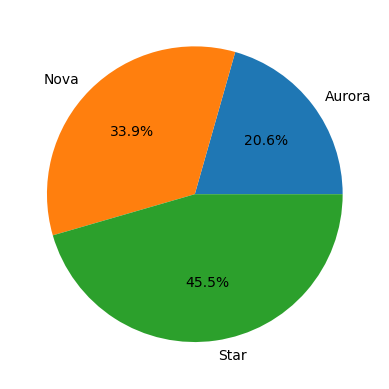

In [ ]:
plt.pie("Loyalty Number", labels="Loyalty Card",
        data = cd_loyalty, 
        autopct= "%1.1f%%");

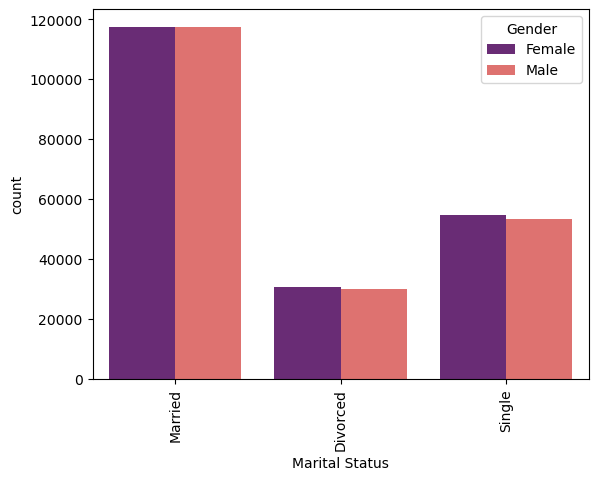

In [ ]:
#6. Cómo se distribuyen los clientes según su estado civil y género? 
sns.countplot(data=customer_data, 
              x="Marital Status", 
              hue="Gender",
              palette="magma");
plt.xticks(rotation=90);